# Supervised Learning - Linear Regression

This collab notebook is an introduction to simple and multiple Linear Regression.

### Population and Sample

Population is all observations for a given problem, while sample is just part of population. We want to estimate some underlying relationships in population using only sample from it. That's the essence of statistical modeling.

![alt text](https://newonlinecourses.science.psu.edu/stat200/sites/stat200/files/inline-images/InferenceGraphicSU17.png)

### Linear Regression - Intuition

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

Head to https://www.kaggle.com/rakannimer/air-passengers and download the data.

In [0]:
from google.colab import files

uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [0]:
!unzip air-passengers.zip

unzip:  cannot find or open air-passengers.zip, air-passengers.zip.zip or air-passengers.zip.ZIP.


In [0]:
df = pd.read_csv('AirPassengers.csv')

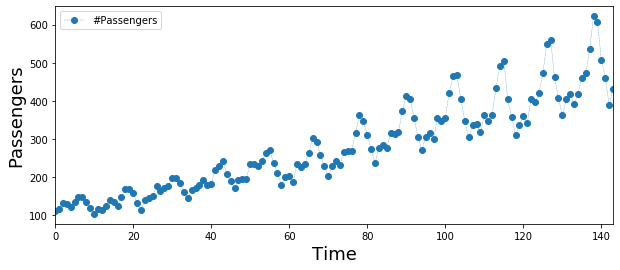

In [0]:
# Seperate Passengers from time
X = pd.DataFrame(df.index)
X.columns = ['time']
Y = df['#Passengers']

# Plot 
df.plot(figsize = (10,4), style = 'o--', linewidth = 0.3)
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Passengers',fontsize = 18)
plt.show()

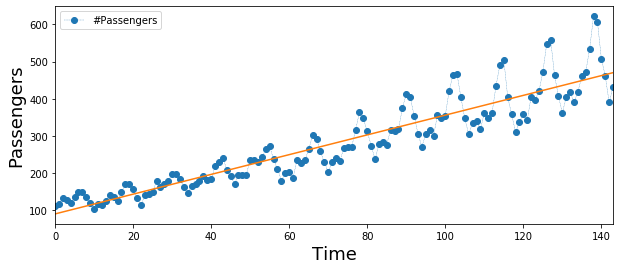

In [0]:
# Fit Regression
ols = LinearRegression()
ols.fit(X,Y)

# Plot
df.plot(figsize = (10,4), style = 'o--', linewidth = 0.3)
plt.plot(ols.predict(X))
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Passengers',fontsize = 18)
plt.show()

X - independent variable<br>
Y - dependent variable

Linear Regression estimates a linear relation $\hat{y} = b_0+b_1x$. The relationship between _real_ datapoints will be $y = b_0+b_1x+\varepsilon$, where $\varepsilon$ is the error between the real and estimated points. The logic behind is to fit a line **(find such $b_0$ and $b_1$)** which is has smallest errors to all datapoints in some sense. 

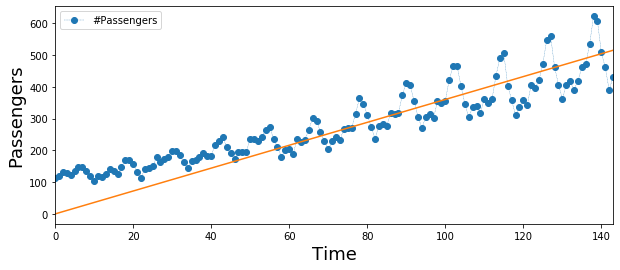

In [0]:
# Fit Regression without intercept
ols = LinearRegression(fit_intercept=False)
ols.fit(X,Y)

# Plot
df.plot(figsize = (10,4), style = 'o--', linewidth = 0.3)
plt.plot(ols.predict(X))
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Passengers',fontsize = 18)
plt.show()

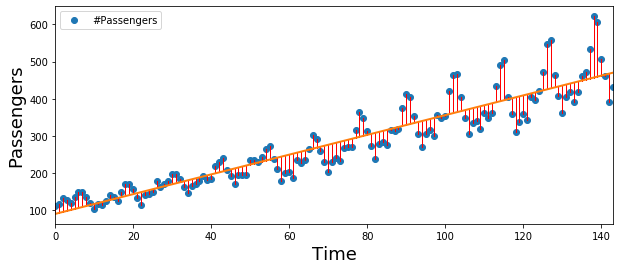

In [0]:
# Fit Regression
ols = LinearRegression()
ols.fit(X,Y)
pred_line = ols.predict(X)

# Plot
df.plot(figsize = (10,4), style = 'o', linewidth = 0.3)
for i in range(len(Y)):
    plt.plot([X.loc[i],X.loc[i]],[Y[i],pred_line[i]],'r', linewidth = 1)
plt.plot(pred_line, linewidth = 2)
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Passengers',fontsize = 18)
plt.show()

One obvious way to mimimize errors would be to calculate their sum $\sum_{i=1}^{n}{\varepsilon_i}$ and try to make it closer to 0. That will cause problems, as some errors might cancel each other.

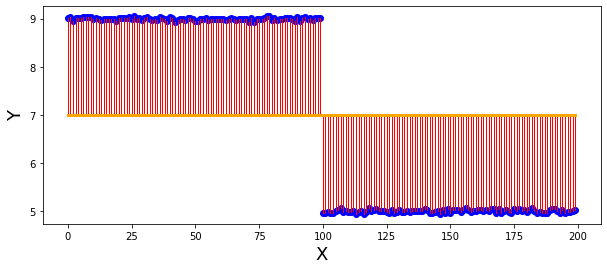

In [0]:
# Plot dummy example
X = [i for i in range(200)]
Y = [9+np.random.normal(0,0.03) for i in range(100)]+[5+np.random.normal(0,0.03) for i in range(100)]
pred_line = [7 for i in range(200)]
plt.figure(figsize  = (10,4))
plt.plot(X,Y, 'bo')
for i in range(len(Y)):
    plt.plot([X[i],X[i]],[Y[i],pred_line[i]],'r', linewidth = 1)
plt.plot(X,pred_line,'orange',linewidth = 3)
plt.xlabel('X',fontsize = 18)
plt.ylabel('Y',fontsize = 18)
plt.show()

In [0]:
# sum of errors
np.sum(np.array(Y)-np.array(pred_line))

-0.22911611862036807

In this case the line on point 7 will have close to 0 error, while the individual errors are quite big. By tilting the line a little bit we can decrease all individual erros.

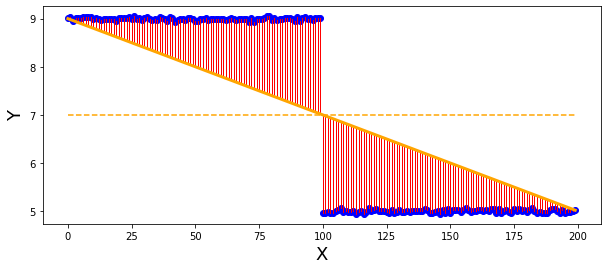

In [0]:
# Plot dummy example
pred_line = [7+(100-i)/50 for i in range(200)]
plt.figure(figsize  = (10,4))
plt.plot(X,Y, 'bo')
for i in range(len(Y)):
    plt.plot([X[i],X[i]],[Y[i],pred_line[i]],'r', linewidth = 1)
plt.plot(X,pred_line,'orange',linewidth = 3)
plt.plot(X,[7 for i in range(200)],'--',c = 'orange')
plt.xlabel('X',fontsize = 18)
plt.ylabel('Y',fontsize = 18)
plt.show()

In [0]:
# sum of errors
np.sum(np.array(Y)-np.array(pred_line))

-2.2291161186203965

Logical next step is to take the absolute value of errors $\sum_{i=1}^{n}{|\varepsilon_i|}$ which is usually called **MAD** _mean absolute deviation_. That error function is somewhat useful and some problems may practically give good solution, however one of its problems is that it is non-differentiable at a point which may cause problems during computing. To avoid it can use the square of errors $\sum_{i=1}^{n}{\varepsilon_i^2}$ which is called **MSE** _mean squared error_

### Linear Regression - Math

So now we want to minimize _MSE_ w.r.t. $b_0$ and $b_1$.<br>
We can solve the problem by calculating derivative and finding the minimum point of MSE.

$$\sum_{i=1}^{n}{\varepsilon_i^2} = \sum_{i=1}^{n}{(y_i-\hat{y})^2} = \sum_{i=0}^{n}{(y_i-b_0-b_1x_i)^2}$$<br>
$$MSE'_{b_0} = \sum_{i=1}^{n}{-2(y_i-b_0-b_1x_i)} = 0$$<br>
$$\sum_{i=1}^{n}{y_i}-b_0n-b_1\sum_{i=1}^{n}{x_i} = 0$$<br>
$$\bar{y}-b_0-b_1\bar{x} = 0$$<br>
$$b_0 = \bar{y}-b_1\bar{x}$$<br>
$$MSE'_{b_1} = \sum_{i=1}^{n}{-2x_i(y_i-b_0-b_1x_i)} = 0$$<br>
$$\sum_{i=1}^{n}{(x_iy_i-b_0x_i-b_1x_i^2)} = 0$$<br>
$$\sum_{i=1}^{n}{x_iy_i}-b_0\sum_{i=1}^{n}{x_i}-b_1\sum_{i=1}^{n}{x_i^2} = 0$$<br>
$$\sum_{i=1}^{n}{x_iy_i}-(\bar{y}-b_1\bar{x})\sum_{i=1}^{n}{x_i}-b_1\sum_{i=1}^{n}{x_i^2} = 0$$<br>
$$\sum_{i=1}^{n}{x_iy_i}-\bar{y}\sum_{i=1}^{n}{x_i}+b_1\bar{x}\sum_{i=1}^{n}{x_i}-b_1\sum_{i=1}^{n}{x_i^2} = 0$$<br>
$$\sum_{i=1}^{n}{x_iy_i}-\bar{y}\sum_{i=1}^{n}{x_i} = b_1(\sum_{i=1}^{n}{x_i^2}-\bar{x}\sum_{i=1}^{n}{x_i})$$<br>
$$\sum_{i=1}^{n}{x_iy_i}-n\bar{x}\bar{y} = b_1(\sum_{i=1}^{n}{x_i^2}-n\bar{x}^2)$$<br>
$$b_1 = \frac{\sum_{i=1}^{n}{x_iy_i}-n\bar{x}\bar{y}}{\sum_{i=1}^{n}{x_i^2}-n\bar{x}^2}$$<br>
$$b_1 = \frac{\sum_{i=1}^{n}{x_iy_i}-n\bar{x}\bar{y}+n\bar{x}\bar{y}-n\bar{x}\bar{y}}
{\sum_{i=1}^{n}{x_i^2}-n\bar{x}^2+n\bar{x}^2-n\bar{x}^2}$$<br>
$$b_1 = \frac{\sum_{i=1}^{n}{x_iy_i}-\sum_{i=1}^{n}\bar{x}\bar{y}+\sum_{i=1}^{n}{x_i}\bar{y}-\sum_{i=1}^{n}{y_i}\bar{x}}
{\sum_{i=1}^{n}{x_i^2}-2\sum_{i=1}^{n}{x_i}\bar{x}+\sum_{i=1}^{n}\bar{x}^2}$$<br>
$$b_1 = \frac{\sum_{i=1}^{n}{(x_iy_i-\bar{x}\bar{y}+x_i\bar{y}-y_i\bar{x})}}
{\sum_{i=1}^{n}{(x_i^2-2x_i\bar{x}+\bar{x}^2)}}$$<br>
$$b_1 = \frac{\sum_{i=1}^{n}{(y_i-\bar{y})(x_i-\bar{x})}}
{\sum_{i=1}^{n}{(x_i-\bar{x})^2}}$$<br>
$$b_1 = \frac{\sum_{i=1}^{n}{\tilde{x_i}\tilde{y_i}}}
{\sum_{i=1}^{n}{\tilde{x_i}^2}},$$<br>
$$ \quad where \quad \tilde{x_i} = x_i-\bar{x} \quad
and \quad \tilde{y_i} = y_i-\bar{y}$$

Now let's dive in into multiple regression. We can have many independent variables which account for change in dependent variable $y = b_0+b_1x_1+b_2x_2+...+b_mx_m$. In that case we are going to use matrix operations to derive each coefficient.

$$Y = \begin{pmatrix}y_1\\y_2\\.\\.\\.\\y_n\end{pmatrix} \quad
X = \begin{pmatrix}1&x_{11}&x_{12}&.&.&.&x_{1m}\\1&x_{21}&x_{22}&.&.&.&x_{2m}\\.\\.\\.\\1&x_{n1}&x_{n2}&.&.&.&x_{nm}\end{pmatrix} 
\quad
b = \begin{pmatrix}b_0\\b_1\\.\\.\\.\\b_m\end{pmatrix} \quad
\hat{Y} = Xb$$

$$\varepsilon = Y-\hat{Y} \quad MSE = \varepsilon^T\varepsilon$$<br>
$$MSE = (Y-Xb)^T(Y-Xb) = $$<br>
$$ = Y^TY-b^TX^TY-Y^TXb+b^TX^TXb$$

as  $b^TX^TY$ (1xm)(mxn)(nx1) and $Y^TXb$ (1xn)(nxm)(mx1) are scalars, their transposes are the same as they, so $b^TX^TY = (b^TX^TY)^T = Y^TXb$

$$MSE = Y^TY-2b^TX^TY+b^TX^TXb$$<br>
$$MSE'_b = -2X^TY +2X^TXb = 0$$<br>
$$X^TXb = X^TY$$<br>
$$b = (X^TX)^{-1}X^TY$$

### Linear Regression - Spotting patterns

Now let's get back to the air passengers data.

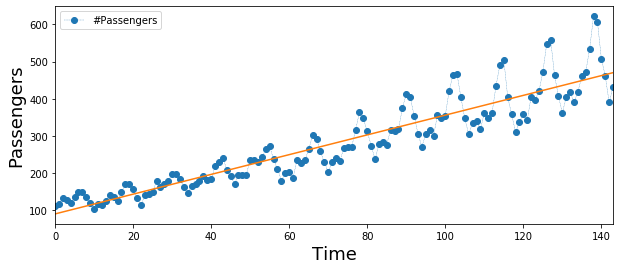

In [0]:
# Seperate Passengers from time
X = pd.DataFrame(df.index)
X.columns = ['time']
Y = df['#Passengers']

# Fit Regression
ols = LinearRegression()
ols.fit(X,Y)

# Plot
df.plot(figsize = (10,4), style = 'o--', linewidth = 0.3)
plt.plot(ols.predict(X))
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Passengers',fontsize = 18)
plt.show()

It's useful to plot errors of the model, which can reveal some patterns who don't immediately see from the plot above and it's always in one dimension which is visually understandable.

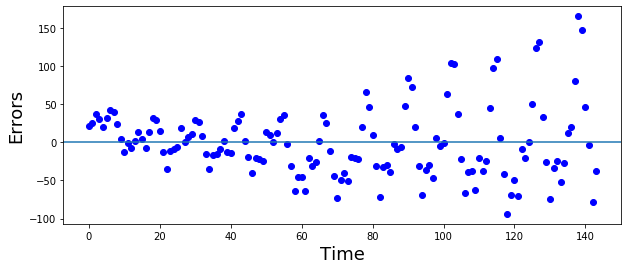

In [0]:
# Plot Errors
plt.figure(figsize = (10,4))
plt.plot(Y-ols.predict(X),'bo')
plt.axhline()
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Errors',fontsize = 18)
plt.show()

We can observe, that there is a kind of an exponential relationship between time and and errors. This means that we have failed to capture that relationship and the iniitial linear (for the time variable) regression doesn't show all picture. **We have violated the assumption that relationship between X and Y is linear**.

In [0]:
np.square(Y-ols.predict(X)).mean()

2091.7994339346533

In [0]:
# add the logarithm of the time
X['time_log'] = X.apply(lambda x: np.log(x+1))

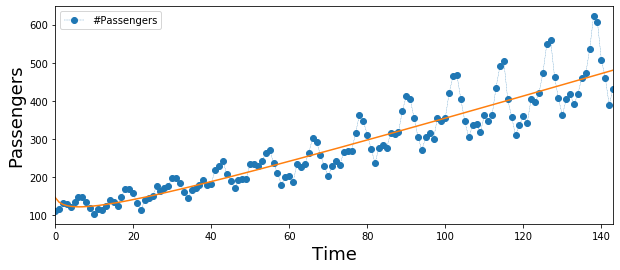

In [0]:
# Fit Regression
ols = LinearRegression()
ols.fit(X,Y)

# Plot
df.plot(figsize = (10,4), style = 'o--', linewidth = 0.3)
plt.plot(ols.predict(X))
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Passengers',fontsize = 18)
plt.show()

In [0]:
np.square(Y-ols.predict(X)).mean()

2000.4346286992456

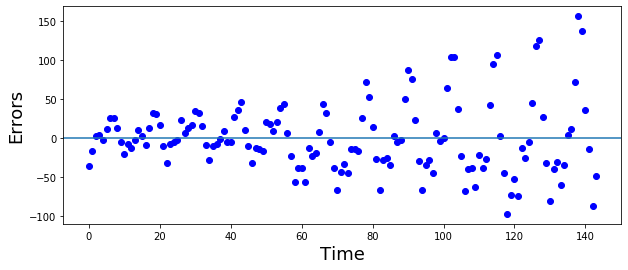

In [0]:
# Plot Errors
plt.figure(figsize = (10,4))
plt.plot(Y-ols.predict(X),'bo')
plt.axhline()
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Errors',fontsize = 18)
plt.show()

Observe that the exponential pattern has gone, but there is another pattern of errors oscillating. The oscillation comes from months (just think logically about it and observe that the oscillations are kind of repeated with 12 frequency).

In [0]:
# add months to the regression
X['Months'] = df['Month'].apply(lambda x: x[-2:]) # STARTING FROM SECOND COLUMN TO AVOID 0 DETERMINANT

In [0]:
X.head()

,time,time_log,Months
0,0,0.000000,01
1,1,0.693147,02
2,2,1.098612,03
3,3,1.386294,04
4,4,1.609438,05


In [0]:
X = pd.get_dummies(X,drop_first=True)

In [0]:
X.head()

,time,time_log,Months_02,Months_03,Months_04,Months_05,Months_06,Months_07,Months_08,Months_09,Months_10,Months_11,Months_12
0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0
1,1,0.693147,1,0,0,0,0,0,0,0,0,0,0
2,2,1.098612,0,1,0,0,0,0,0,0,0,0,0
3,3,1.386294,0,0,1,0,0,0,0,0,0,0,0
4,4,1.609438,0,0,0,1,0,0,0,0,0,0,0


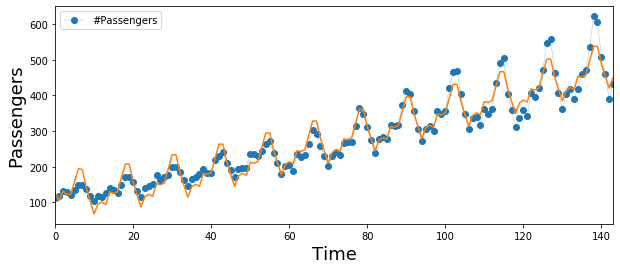

In [0]:
# Fit Regression
ols = LinearRegression()
ols.fit(X,Y)

# Plot
df.plot(figsize = (10,4), style = 'o--', linewidth = 0.3)
plt.plot(ols.predict(X))
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Passengers',fontsize = 18)
plt.show()

In [0]:
np.square(Y-ols.predict(X)).mean()

517.4673535187641

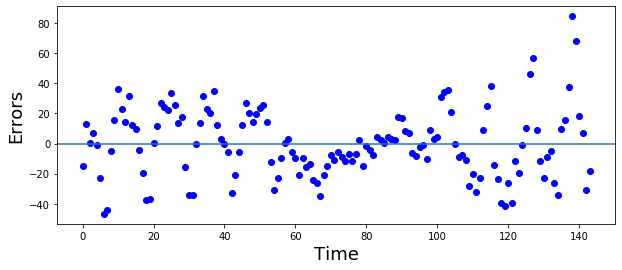

In [0]:
# Plot
plt.figure(figsize = (10,4))
plt.plot(Y-ols.predict(X),'bo')
plt.axhline()
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Errors',fontsize = 18)
plt.show()

Some oscillation has still remained. That's because the ociliation differ from time to time in variance. if we integrate that kind of information into regression it should become better. **This problem, that error variance is dependent on X is called Heteroscedasticity**.

In [0]:
# add time component to months
for col in list(X.columns)[2:]: # STARTING FROM SECOND COLUMN TO AVOID 0 DETERMINANT
    X[col+'_time'] = X[col]*X['time']

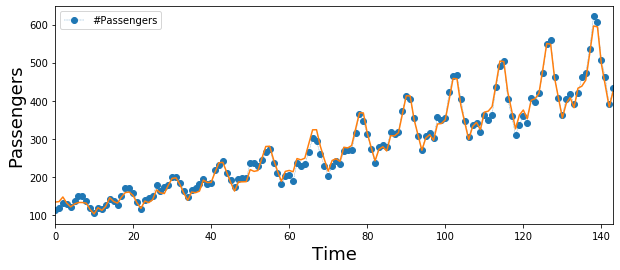

In [0]:
# Fit Regression
ols = LinearRegression()
ols.fit(X,Y)

# Plot
df.plot(figsize = (10,4), style = 'o--', linewidth = 0.3)
plt.plot(ols.predict(X))
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Passengers',fontsize = 18)
plt.show()

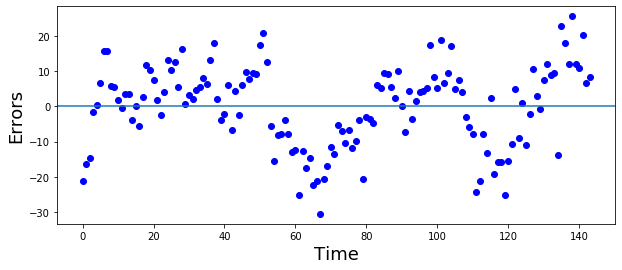

In [0]:
# Plot Errors
plt.figure(figsize = (10,4))
plt.plot(Y-ols.predict(X),'bo')
plt.axhline()
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Errors',fontsize = 18)
plt.show()

Linear Regression - Interpretation

In [0]:
import statsmodels.api as sm

In [0]:
m = sm.OLS(Y,sm.add_constant(X.drop('time_log', axis = 1)))
r = m.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:            #Passengers   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     343.4
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           2.78e-98
Time:                        22:18:16   Log-Likelihood:                -590.64
No. Observations:                 144   AIC:                             1229.
Df Residuals:                     120   BIC:                             1301.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             88.9231      8.699     10.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


the `coef` is our $\beta$-s of linear regression. Thus our equation would be.



$$\hat{y} = 88.9231 +2.3156*time+9.1096*Months2+...+0.0475*Months12$$

We can say the following, considering that **other varibles remain constant** our estimate of passengers count will increase by $2.3156$ if we increase time by $1$ (i.e. month by $1$)

Same goes for all other variables with their coefficients.

the `P>|t|`, namely **p-value** shows that the coefficient is different from 0 if p-value is less than 0.05. 

The `std err` is **standart error** and shows the variability of our estimate.

Right from p-value is **confidence interval** `[0.025      0.975]`. We say that we are 95% sure that our estimate of correspnding coefficient is in the range of given interval. If the inteval does not contain $0$ then we can say that we are at least 95% sure that our estimate is not $0$.

### Linear Regression - $R^2$

The $R^2$ is  a metric which shows how much the variablity of $X$ explains the variability of $Y$. The idea is the following:<br>
_Construct a simple predictor for y by using the average y. Construct second model using X. Then we compare how much variance is 2nd model capturing in comparison with 1st model._

$$SST = \sum_\limits{i}(y_i-\bar{y})^2$$
$$SSR = \sum_\limits{i}(\hat{y}_i-\bar{y})^2$$
$$SSE = \sum_\limits{i}(y_i-\hat{y})^2$$
$$SST = SSR + SSE$$
$$R^2= 1-\frac{SSE}{SST}$$


By definition $R^2$ will only increase as we include more variables. Thus we can infalte it's value be adding non snensical variables. To account for that phenomenon and adjustment is made to it which accounts the number of variables being estimated.

$$R^2_{adj}= 1-(1-R^2)\frac{n-1}{n-p-1}$$

$n$ is sample size, $p$ is variable count.

### Linear Regression - Information criteria

Information criteria are used to select best model out of a pool of models. The lower information criterion the better the model. Intuitivelly they measure how much information is your model capturing.

AIC (Akaike information criterion) and BIC (Bayesian information criterion)

$$AIC = -2LL+2k$$
$$BIC = -2LL+2klog(n)$$

### Homework

Write a class of Linear Regression which should have `fit` (which calculates the coefficients), `predict` (which calculates an estimate) `r_squared` (which calculates $R^2$) `adj_r_squared` (which calculates adjusted $R^2$) methods.

**Additional notes:**

1) Use Numpy for only matrix manipulations like adding, multiplying, inverting. 

2) Don't use any ready made library for linear regression.

3) Also implementing AIC and BIC is considered a plus.

4) If you are uncomfortable with OOP (classes) you are free to not use it.

### Resources
OLS in matrix form and assumptions https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf

Assumptions for LR https://warwick.ac.uk/fac/soc/economics/staff/vetroeger/teaching/po906_week8910.pdf

Full econometric course playlist https://www.youtube.com/watch?v=M_5SLG7sUa0&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU